<a href="https://colab.research.google.com/github/Rohit0994/EDA-Hotel-Data-Analysis/blob/main/EDA_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis



##### **Project Type**    - **EDA**
##### **Contribution**    - **Team**
##### **Team Member 1 -** - **Rohit Sharma**
##### **Team Member 2 -** - **Piyush Sirotha**


# **Project Summary -**

This Project Contains the real world data record of Hotel bookings of a city and resort hotel containing details like booking , cancellation guest details etc thing for duration 2015 to 2017 year.

Main Aim of this project to understand and visualize data set from Hotel and Customer Point of view like:-

- Reason of booking and cancellation of hotel on some parameters.
- Best Suitable time to book Hotel.
- Identify the Peak Season.

# **GitHub Link -**

Provide your GitHub Link here.
https://github.com/Rohit0994/EDA-Hotel-Data-Analysis.git

# **Problem Statement**


Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings.


#### **Define Your Business Objective?**

Reduce cancellation and increase Hotel Revenue(ADR).

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
from datetime import datetime
from datetime import date

### Dataset Loading

In [2]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
#Read the CSV file

hotel_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pandas data set/Hotel Bookings.csv")

###**Let's Copy the data set that our original data set remain unchanged**###

In [4]:
# Copy the data set that our original data set remain unchanged
df=hotel_data.copy()   

### Dataset First View

In [5]:
# Dataset First Look
# Using Transpose to convert rows into columns and columns into rows for better representation of data.
df.head().T  #top 5 rows of the data set

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


### Dataset Rows & Columns count

In [6]:

# Dataset Rows & Columns count
#Rows=>119390 , column=>32

df.shape

(119390, 32)

### Dataset Information

In [7]:
# Dataset Info
# using info method  to identify the data type of each column and to count null / not-null values to their respective coulumns.
df.info()

'''
1. Lead Time=> when a guest makes the reservation and the actual check-in/arrival date.
2. Transient customer=>simply people that require a very short term stay in your facility.
3. Average Daily Rate(ADR)= Rooms Revenue Earned/Number of Rooms Sold (how much revenue is made per room on average).
4. Transient=>groups that are occupying less than 10 rooms per night (short term stay ).

​

'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

'\n1. Lead Time=> when a guest makes the reservation and the actual check-in/arrival date.\n2. Transient customer=>simply people that require a very short term stay in your facility.\n3. Average Daily Rate(ADR)= Rooms Revenue Earned/Number of Rooms Sold (how much revenue is made per room on average).\n4. Transient=>groups that are occupying less than 10 rooms per night (short term stay ).\n\n\u200b\n\n'

In this data set there are total 32 columns, In these columns we found 4 columns having null values such as Children, Country, Agent, Company.

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count

df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

-Here we can see there are 31994 Duplicate values

### **Missing Values/Null Values**###

In [9]:
# Missing Values/Null Values Count
df.isnull().sum().sort_values(ascending=False)[:5]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
dtype: int64

We have found that Company have more number of Null values which is 112593 , followed by agent, country , children.

In [10]:
# Visualizing the missing values
# For company agent we are fiiling the null values with (0).
df[["company","agent"]]=df[["company","agent"]].fillna(0)

In [11]:
# For Country we are fiiling the null values with (0)
df["country"].fillna("others", inplace=True)

In [12]:
# For children we found some unique values such as (0.,  1.,  2., 10.,  3., nan).
#  In this we found some (nan) values.
df["children"].unique()


array([ 0.,  1.,  2., 10.,  3., nan])

In [13]:
# Successfully Handled null values ,by replacing it with mean.
df["children"].fillna(df["children"].mean(), inplace=True)

In [14]:
# Counterchecking the null values if any left.
# we have found there is no null values in our data set.
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

#### Now there is no null value present in our data set

### What did you know about your dataset?

**Answer Here**

In our data set we found that there are 32 columns followed by 5 rows.
In these columns we have some null values and found the data type of each column.
We have float64(4), int64(16), object(12) 
numericals columns = 20
object/categorical columns = 12

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
list(df.columns)
# list of columns are as follows.

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [16]:
# Dataset Describe
# Describing the statistics of numerical columns.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103890,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


### Variables Description 

**Answer Here**

1. **hotel** : Hotel (Resort Hotel or City Hotel)

2. **is_canceled** : Value indicating if the booking was canceled (1) or not (0)

3. **lead_time** : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

4. **arrival_date_year** : Year of arrival date

5. **arrival_date_month** : Month of arrival date

6. **arrival_date_week_number** : Week number of year for arrival date

7. **arrival_date_day_of_month** : Day of arrival date

8. **stays_in_weekend_nights** : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

9. **stays_in_week_nights** : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

10. **adults** : Number of adults

11. **children** : Number of children

12. **babies** : Number of babies

13. **meal** : Type of meal booked. Categories are presented in standard hospitality meal packages:

14. **country** : Country of origin.`

15. **market_segment** : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

16. **distribution_channel** : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

17. **is_repeated_guest** : Value indicating if the booking name was from a repeated guest (1) or not (0)

18. **previous_cancellations** : Number of previous bookings that were cancelled by the customer prior to the current booking

19. **previous_bookings_not_canceled** : Number of previous bookings not cancelled by the customer prior to the current booking

20. **reserved_room_type** : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

21. **assigned_room_type** : Code for the type of room assigned to the booking.

22. **booking_changes** : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**deposit_type** : Indication on if the customer made a deposit to guarantee the booking.

23. **agent** : ID of the travel agency that made the booking

24. **company** : ID of the company/entity that made the booking or responsible for paying the booking.

25. **days_in_waiting_list** : Number of days the booking was in the waiting list before it was confirmed to the customer

26. **customer_type** : Type of booking, assuming one of four categories

27. **adr** : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

28. **required_car_parking_spaces** : Number of car parking spaces required by the customer

29. **total_of_special_requests** : Number of special requests made by the customer (e.g. twin bed or high floor)

30. **reservation_status** : Reservation last status, assuming one of three categories

a). **Canceled** – booking was canceled by the customer
b). **Check-Out** – customer has checked in but already departed
c). **No-Show** – customer did not check-in and did inform the hotel of the reason 

31. **reservation_status_date** : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
# to check the number of unique values in each column. 
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             6
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              334
company                            353
days_in_waiting_list     

## 3. ***Data Wrangling***

In [18]:
# To count that in which year of which month most number of customers arrived at  hotel.
df.groupby(['arrival_date_month', 'arrival_date_year']).count()
# 


hotel  is_canceled  lead_time  \
arrival_date_month arrival_date_year                                  
April              2016                5428         5428       5428   
                   2017                5661         5661       5661   
August             2015                3889         3889       3889   
                   2016                5063         5063       5063   
                   2017                4925         4925       4925   
December           2015                2920         2920       2920   
                   2016                3860         3860       3860   
February           2016                3891         3891       3891   
                   2017                4177         4177       4177   
January            2016                2248         2248       2248   
                   2017                3681         3681       3681   
July               2015                2776         2776       2776   
                   2016                4572         4572       4572   
                   2017                5313         5313       5313   
June               2016                5292         5292       5292   
                   2017                5647         5647       5647   
March              2016                4824         4824       4824   
                   2017                4970         4970       4970   
May                2016                5478         5478       5478   
                   2017                6313         6313       6313   
November           2015                2340         2340       2340   
                   2016                4454         4454       4454   
October            2015                4957         4957       4957   
                   2016                6203         6203       6203   
September          2015                5114         5114       5114   
                   2016                5394         5394       5394   

                                      arrival_date_week_number  \
arrival_date_month arrival_date_year                             
April              2016                                   5428   
                   2017                                   5661   
August             2015                                   3889   
                   2016                                   5063   
                   2017                                   4925   
December           2015                                   2920   
                   2016                                   3860   
February           2016                                   3891   
                   2017                                   4177   
January            2016                                   2248   
                   2017                                   3681   
July               2015                                   2776   
                   2016                                   4572   
                   2017                                   5313   
June               2016                                   5292   
                   2017                                   5647   
March              2016                                   4824   
                   2017                                   4970   
May                2016                                   5478   
                   2017                                   6313   
November           2015                                   2340   
                   2016                                   4454   
October            2015                                   4957   
                   2016                                   6203   
September          2015                                   5114   
                   2016                                   5394   

                                      arrival_date_day_of_month  \
arrival_date_month arrival_date_year                              
April              2016                                    5428   

####July and August have 3 rows compared to other months. This would be taken into account into the project

### Data Wrangling Code

In [19]:
#Customer type 
Customer_type=df['customer_type'].value_counts().sort_values(ascending=False)
Customer_type
# In hotel booking  Transient customers type is more than the other customer types. 

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [20]:
#Room type
reserved_room = df['reserved_room_type'].value_counts()
reserved_room.sort_values(ascending=False)
# most Prefered room type by the customers is "A".

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [21]:
assign_room = df['assigned_room_type'].value_counts()
assign_room.sort_values(ascending=False)

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [22]:
# To concatenate the coulumns of assigned-room with reserved-room. 
room_comparision = pd.concat([assign_room,reserved_room],axis=1)
room_comparision
# We got that two nan values are occured in reserved room type.

,assigned_room_type,reserved_room_type
A,74053,85994.0
D,25322,19201.0
E,7806,6535.0
F,3751,2897.0
G,2553,2094.0
C,2375,932.0
B,2163,1118.0
H,712,601.0
I,363,NaN
K,279,NaN


In [23]:
# Indication on if the customer made a deposite to guarantee the booking.
Deposit_type= df['deposit_type'].value_counts()
Deposit_type


No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [24]:
# To find out how many bookings have been canceled or not.
Is_canceled=df['is_canceled'].value_counts()
Is_canceled.reset_index()

,index,is_canceled
0,0,75166
1,1,44224


In [25]:
# to conate the deposit_type and is_canceled columns
z= pd.concat([Deposit_type,Is_canceled],axis=1)
z

,deposit_type,is_canceled
No Deposit,104641.0,NaN
Non Refund,14587.0,NaN
Refundable,162.0,NaN
0,NaN,75166.0
1,NaN,44224.0


In [26]:
# Renaming the 0,1 indexes to not canceled and canceled respectively
z_new = z.rename(columns = {'deposit_type':'Type of deposit','is_canceled':'Is canceled'},index = {0:'not canceled',1:'canceled'})
z_new

,Type of deposit,Is canceled
No Deposit,104641.0,NaN
Non Refund,14587.0,NaN
Refundable,162.0,NaN
not canceled,NaN,75166.0
canceled,NaN,44224.0


"No deposit cancellations are high compared to other categories but these should not be a problem\n as bookings in this category are also very high compared to non refundable type bookings\n \n Around 25% of bookings were cancelled by guests with no deposit. These numbers are huge if the hotels\n  were not able to replace the cancelled bookings in time. So it's obvious that guests who do not pay \n  any deposit while booking are likely to cancel more reservations."

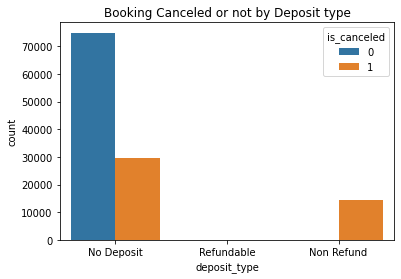

In [27]:
df[df.deposit_type== 'Refundable'].deposit_type.count()

plt.title("Booking Canceled or not by Deposit type")
sns.countplot(x='deposit_type',data=df ,hue='is_canceled')   #seaborn

'''No deposit cancellations are high compared to other categories but these should not be a problem
 as bookings in this category are also very high compared to non refundable type bookings
 
 Around 25% of bookings were cancelled by guests with no deposit. These numbers are huge if the hotels
  were not able to replace the cancelled bookings in time. So it's obvious that guests who do not pay 
  any deposit while booking are likely to cancel more reservations.'''

In [28]:
#number of booking changes(uniarient analysis)

booking= df['booking_changes'].value_counts().sort_index()

booking
# How many customer have changed their booking.

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
11         2
12         2
13         5
14         5
15         3
16         2
17         2
18         1
20         1
21         1
Name: booking_changes, dtype: int64

In [29]:
plt.rcParams['figure.figsize']=(12,5)

Text(0, 0.5, 'Number of bookings')

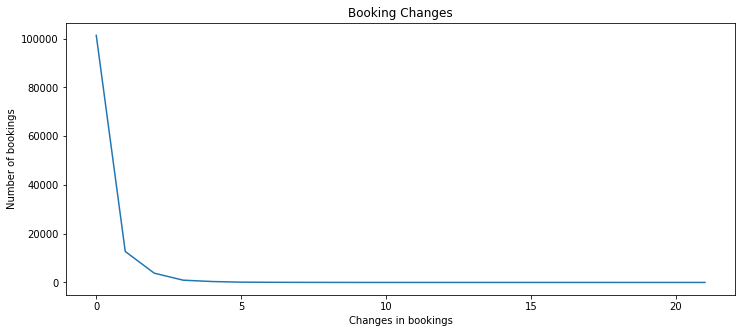

In [30]:
plt.plot(booking)
plt.title('Booking Changes')
plt.xlabel('Changes in bookings')
plt.ylabel('Number of bookings')


#remove duplicates

In [31]:
# we found that there are 31994 duplicate values in our data set
df[df.duplicated()].shape

(31994, 32)

In [32]:
# Cleaning the data by droping the duplicate values.
df.drop_duplicates(inplace=True)


In [33]:
df.shape
# the new shape of real data after removing the duplicate data.

(87396, 32)

finding uniques values 

In [34]:
# unique values of hotel
df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [35]:
# unique values of is_canceled column
df["is_canceled"].unique()


array([0, 1])

In [36]:
# unique values of arrival_date_year
df["arrival_date_year"].unique()

array([2015, 2016, 2017])

In [37]:
# unique values of meal.
df["meal"].unique()


array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [38]:
#how many bookings has not been cancelled
df[df["is_canceled"]!=0].shape
# The customer has not canceled values are (24025)

(24025, 32)

In [39]:
# count of hotel
df["hotel"].value_counts()

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

In [40]:
#ratio of between resort hotel and city hotel
a=df['hotel'].value_counts()
a

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

In [41]:
# Ratio of city hotel
City_Hotel_Ratio = a[0]/df.shape[0]*100
City_Hotel_Ratio.round(2)

61.13

In [42]:
# Ratio of resort hotel
Resort_Hotel_Ratio=a[1]/df.shape[0]*100
Resort_Hotel_Ratio.round(2)

38.87

In [43]:
# hotel ratio
City_Hotel_Ratio.round(2),Resort_Hotel_Ratio.round(2)
# the ratio of booking in city hotel is more than resort hotel

(61.13, 38.87)

In [44]:
# now there is no zero values in above columns
df[df['adults'] + df['children']+df['babies']==0].shape
# We have removed the Zero values in columns , because we dont want to be considered person as value zero

(166, 32)

In [45]:
#converting reservation_status_date to datetime from object
df['new_reservation_status_date']=df['reservation_status_date'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
df['new_reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: new_reservation_status_date, Length: 87396, dtype: datetime64[ns]

In [46]:
# checking the data type of new_reservation_status_date.
print(df.dtypes['new_reservation_status_date'])

datetime64[ns]


In [47]:

#adding a column of total staying days in hotel

df['total_days_stay']= df['stays_in_weekend_nights']+df['stays_in_week_nights']
df['total_days_stay']

0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Name: total_days_stay, Length: 87396, dtype: int64

In [48]:
#adding another column of total people stays in hotel
df['total_person']= df['children']+df['adults']+df['babies']
df['total_person'].head()

0    2.0
1    2.0
2    1.0
3    1.0
4    2.0
Name: total_person, dtype: float64

In [49]:
df['adr'].unique()

array([  0.  ,  75.  ,  98.  , ..., 266.75, 209.25, 157.71])

In [50]:
df['adr'].value_counts().max()

1778

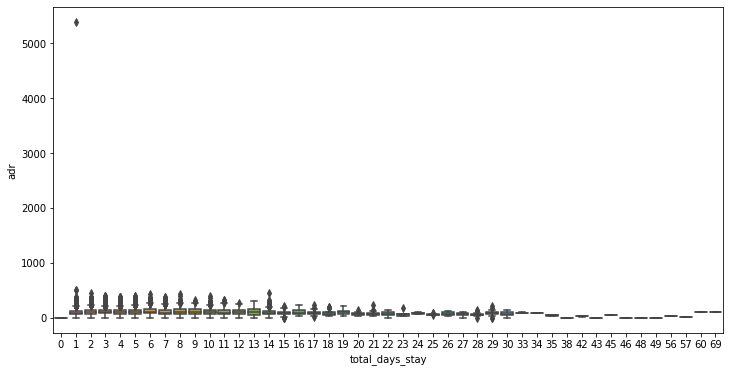

In [51]:
#plotting data for total stays days
plt.figure(figsize = (12,6))
sns.boxplot(y = 'adr', x = 'total_days_stay', data = df)
plt.show()


In [52]:
#there is an outlier in adr so we have to drop it to visualise the better box plot

df.drop(df[df['adr']>5000].index, inplace=True)

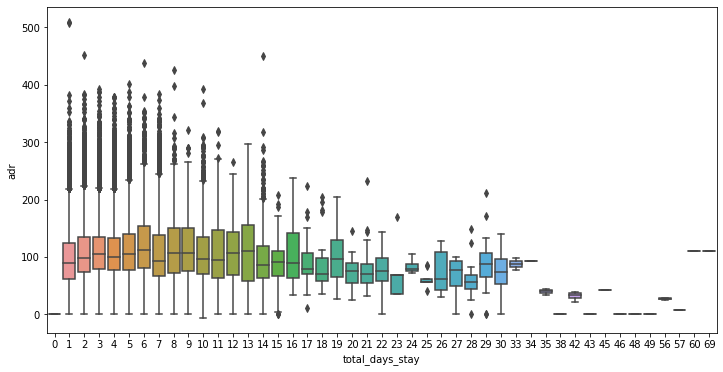

In [53]:
plt.figure(figsize = (12,6))
sns.boxplot(y = 'adr', x = 'total_days_stay', data = df)
plt.show()

#####From this box plot we can see that as length of total_days_stay increasing when the adr is decreasing respectively. This means stay for longer days, the better deal for customer can be finalised

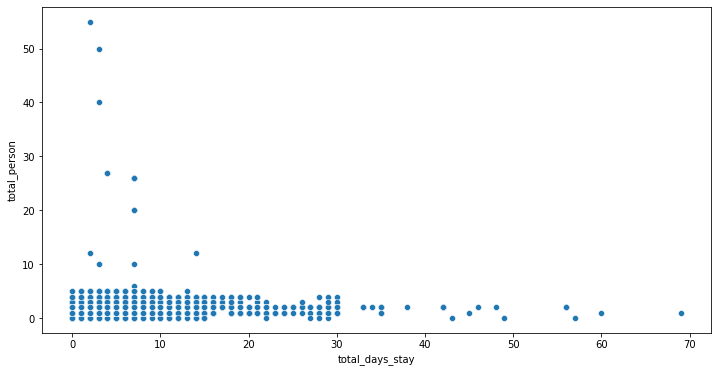

In [54]:
#Relation graph between total person and total days stay by the customer
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'total_person', x = 'total_days_stay', data = df)
plt.show()

#### Here we can predict the groups and Contract are stays for short duration in Hotel, Whereas Transient and Transient-Party stays for long period.


In [55]:
# to find out in which year more guests have arrived.
df['arrival_date_year'].value_counts().sort_index(ascending=False)


2017    31692
2016    42390
2015    13313
Name: arrival_date_year, dtype: int64

In [56]:
#From where the most guests are coming?

df['country'].value_counts().reset_index().head(8)

,index,country
0,PRT,27452
1,GBR,10433
2,FRA,8837
3,ESP,7252
4,DEU,5387
5,ITA,3066
6,IRL,3016
7,BEL,2081


In [57]:
#To find out in which Month more guests have arrived
# Write your code to make your dataset analysis ready.
monthly_arrival =df['arrival_date_month'].value_counts().sort_index(ascending=False)



In [58]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_arrival_new = monthly_arrival.reindex(new_order, axis=0)
monthly_arrival_new

January       4693
February      6098
March         7512
April         7908
May           8355
June          7765
July         10057
August       11257
September     6690
October       6934
November      4995
December      5131
Name: arrival_date_month, dtype: int64

In [59]:
#df['arrival_date_month'] = pd.to_datetime(df['arrival_date_month'])
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [60]:
## Select single, couple, multiple adults and family

not_canceled = df[df['is_canceled'] == 0]


### What all manipulations have you done and insights you found?

-first we have explored the data by using some methods like head,shape,info,
describe etc.

-after that we have removed the null values,outliers and duplicates also.

-Arranging the data in such manner that client could better understand it.

-while we can say that by doing data wraggling we filter and rearrange the required data.




####Most of the bookings are done by couples.It is clear from the graph that their is a sharp increase in arrival num of couples and family in months of July and August. So better plans can be planned accordingly at that time for these type of customers.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#**Univariate Analysis**

#### Chart - 1 - Bar Graph



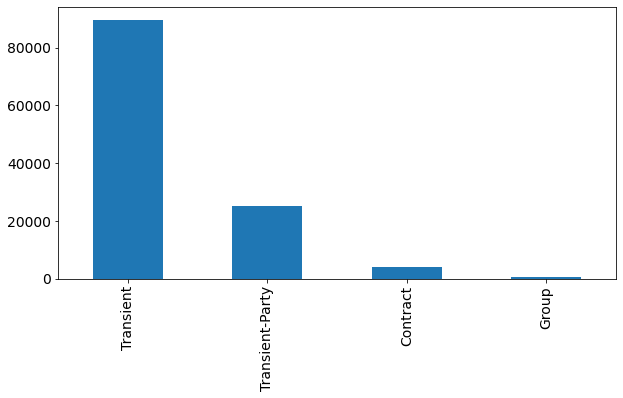

In [61]:
Customer_type.plot.bar(figsize = (10,5),fontsize = 14 )

##### 1. Why did you pick the specific chart?

**Answer Here**. Bar Chart We use for Categorical Variables.
This chart is represented the Relation between type of customers and number of customer came in Hotel,and this Bar chart is clearly shwoing all the details that we are looking for.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here**. As we can see from this chart, number of transient type of customer is more(89613) than all the other type of customer.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


**Answer**
If the Hotel owner focus more on the service and all other need of the transient type of customer then it will give much more impact on the business
 
But at the same time We can elaborate from this chart that Hotels have to focus on Group and Contract to increase the ADR.

#### Chart - 2 - Bar Graph - Comparision

In [62]:
# Chart - 2 visualization code
plt.rcParams['figure.figsize'] = (10,5)

Text(0, 0.5, 'Number of room assigned')

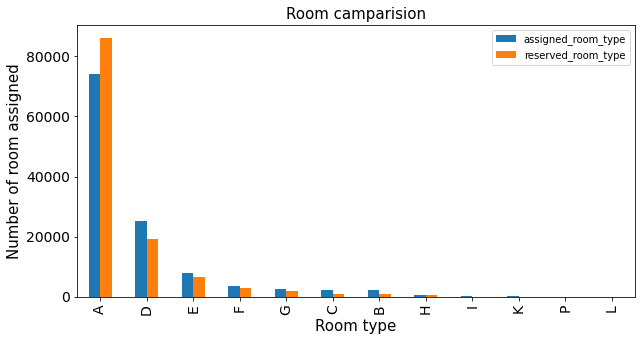

In [63]:
# Explanation of what type of class is more demandable
axs = room_comparision.plot.bar(figsize = (10,5),fontsize = 14 )
axs.set_title("Room camparision",fontsize = 15 )
axs.set_xlabel("Room type",fontsize =15 )
axs.set_ylabel("Number of room assigned",fontsize =15 )

##### 1. Why did you pick the specific chart?


**Answer Here**. This bar chart will help us to answer all the relevent querries regarding the room type.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here**
For room type 'A' rooms are reserved by customer is more as compared to rooms assigned to the customer due to high demand of Type 'A' Room.But if we talk about all other type of rooms,they all have low booking as compared to 'A' room type.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here**

We can see that Hotel have to Assign more rooms than Planning to Reserve room for Type 'A' category, because they are loosing customers because nof not assigning the room for everybody.

#### Chart - 3  Bar Graph(Cancellation)

Text(0.5, 1.0, 'Adr across market segment')

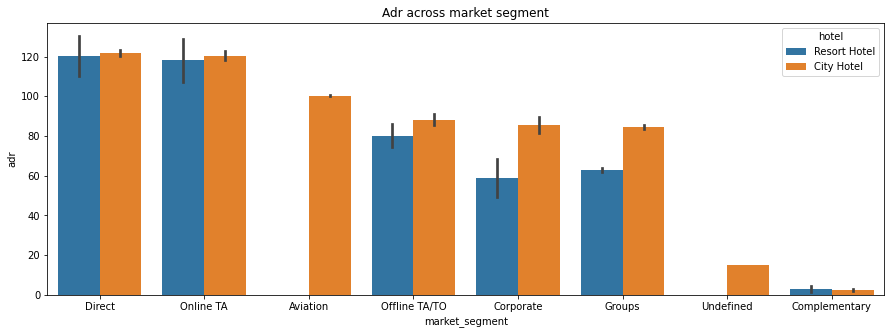

In [64]:
Grupby=df.groupby(['market_segment','hotel','is_canceled'])['adr'].mean().reset_index()   # group by

# set plot size and plto barchart
plt.figure(figsize=(15,5))
sns.barplot(x='market_segment',y='adr',hue='hotel',data=Grupby.sort_values(by='adr',ascending=False))
plt.title('Adr across market segment')

##### 1. Why did you pick the specific chart?

**Answer Here**.
Vertical bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, schools, etc.
This chart gives us a multiple information about ADR and Market segment.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here**.

'Direct' and 'Online TA' are contributing the most in both types of hotels. Aviation segment must be focused by the Resort Hotel.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here**
Resort hotel have to be focused on Aviation segment to increase ADR.

#### Chart - 4  Seborn Linechart(Dual-Axis)

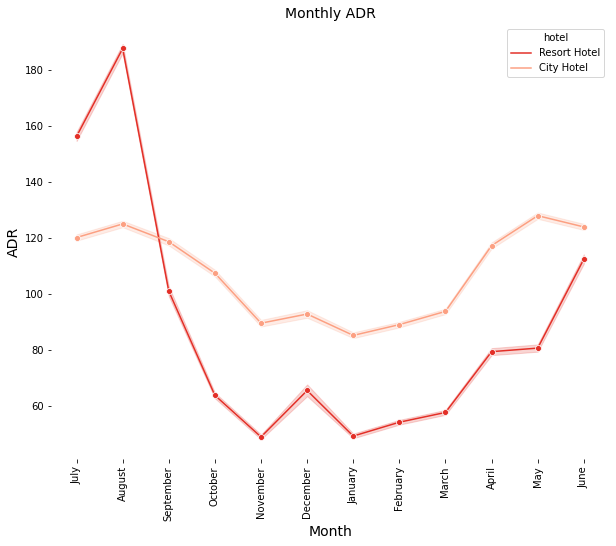

In [65]:
# Monthly ADR representation 
plt.figure(figsize = (12,6))
fig = sns.lineplot(x ='arrival_date_month', 
                   y = 'adr', 
                   hue = 'hotel', 
                   data = df,
                   palette="Reds_r",
                   marker = "o")

plt.xticks(rotation=90)
plt.xlabel('Month',fontsize = 14)
plt.ylabel('ADR',fontsize = 14)
plt.title('Monthly ADR',fontsize = 14) 
sns.despine(bottom = True, left = True)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

##### 1. Why did you pick the specific chart?

**Answer Here**. 
Line graphs are used to track changes over short and long periods of time, even for smaller changes also.
This line dual axis line chart is able to give us the detailed information between resort's and  hotel's average daily rate monthwise.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here**

We can see that the prices increase a lot during the peak season between July and August or we can say that Hotel have highest ADR in July and August Month.
The best time to book in the hotels if you want to have the lowest price is January and November.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer**

During peak season if the owner wants to increase the adr then they can, because guests will still book the rooms. And on the other hand rest of the month they have to take care of their adr according the the months and on the basis of guests.

#### Chart - 5 Pie -Chart

In [66]:
# Chart - 5 visualization code
City_Hotel_Ratio.round(2),Resort_Hotel_Ratio.round(2)

(61.13, 38.87)

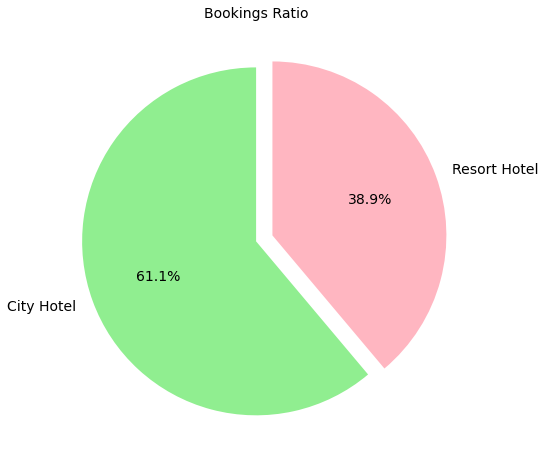

In [67]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = df['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['lightgreen', 'lightpink']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.title('Bookings Ratio',fontsize = 14)
plt.show()

##### 1. Why did you pick the specific chart?


**Answer Here**.
A pie chart helps organize and show data as a percentage of a whole.
As we can se pie chart simply distribute the percentage of bookings which makes it easier to understand

##### 2. What is/are the insight(s) found from the chart?

**Answer Here**

We can see that the percent of City hotel is more compared to Resort hotel.
Resort Hotel tend to be on the expensive side so most of people will just stick with city hotel.
And City hotels are the busiest than Resort Hotels.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here**

Client have to More focus on City hotel, it will tends to be better business growth as compared to resort hotel.

#**BiVariate Analysis**

#### Chart - 6 Scatter plot

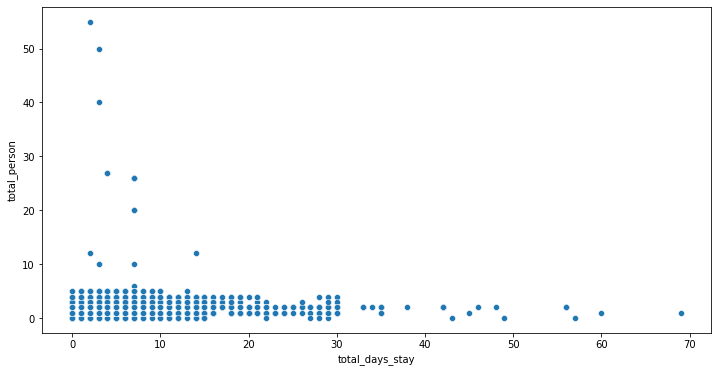

In [68]:
# Chart - 6 visualization code
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'total_person', x = 'total_days_stay', data = df)
plt.show()

##### 1. Why did you pick the specific chart?

**Answer Here**.

Plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another

##### 2. What is/are the insight(s) found from the chart?

**Answer Here**

As we can see that Group and Contract have stayed for shorter span like we can assume that any corporate company have conducted some meeting or event for day or 2 days , and Any family function could be organised in hotel for shorter span, but Transient or group of 2-3 person came from outside to visit the city so they stayed for longer span.

##### 3. Will the gained insights help creating a positive business impact? 


**Answer Here**
Hotels have to provide more facility or we can say conduct group activity to make them stay in hotel for longer span.

#### Chart - 7 bar chart

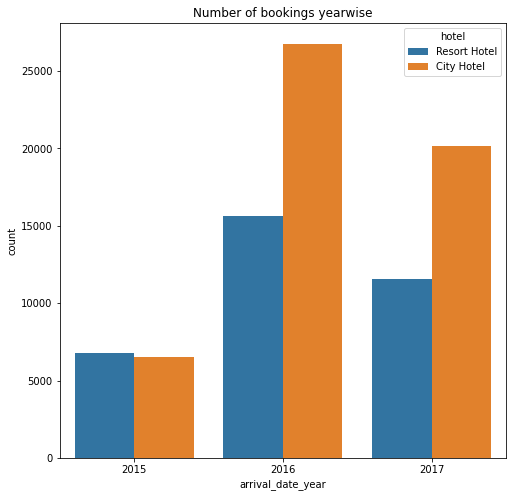

In [69]:
# Chart - 7 visualization code
plt.title("Number of bookings yearwise")
sns.countplot(x='arrival_date_year',data=df, hue = 'hotel')

##### 1. Why did you pick the specific chart?

**Answer Here**.
Year wise comparision between hotel and resort and better visualisation of data. 

##### 2. What is/are the insight(s) found from the chart?

**Answer Here**

As we can see that the number of customer bookings in 2016 is more than as compared to 2015 and 2017 in city hotel.But in 2015, bookings in resort is more than city hotel.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason

**Answer here**

After 2015 ratio of resort to city hotel is decreasing, Resort hotel have to focus to increase the bookings.

#### Chart -  8  Bar Graph

Text(0, 0.5, 'Number of customer')

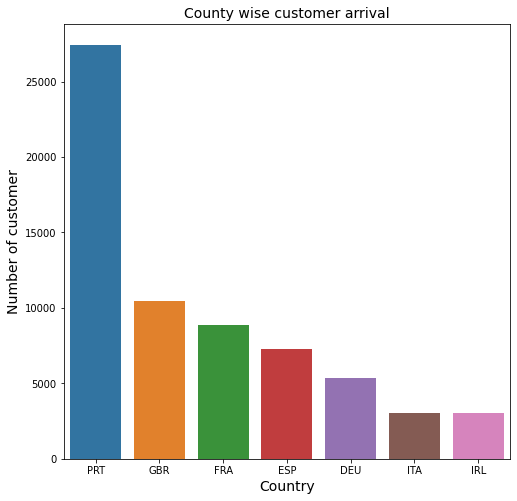

In [70]:
# Chart - 8 visualization code
sns.barplot (y= list(df.country.value_counts().head (7)), 
             x= list(df.country.value_counts().head(7).index))
plt.title('County wise customer arrival',fontsize = 14)
plt.xlabel('Country',fontsize = 14)
plt.ylabel('Number of customer',fontsize = 14)

##### 1. Why did you pick the specific chart?

**Answer Here**.

Easy to understand the bar chart that in which country arrival of customer is more as compared to other. 

##### 2. What is/are the insight(s) found from the chart?

**Answer Here**

As we can see that in all the countries portugal has more arrival of customers.most tourists come from Europe, since the top 5 countries are in Europe.
Probably because the hotel is located in Portugal itself.
We can say that Europian(portugal's people) are more into travelling or explore.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here**

UK people are in less number compare to portugal, but we can assume that UK people are financially strong, so that Hotel have to focus on UK's person so that they can make more ADR.

#### Chart - 9

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


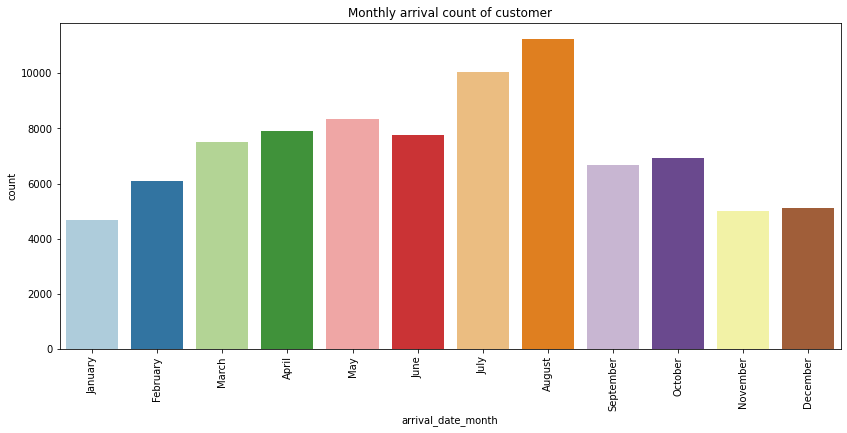

In [71]:
# Chart - 9 visualization code
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(14,6))
sns.countplot(df['arrival_date_month'], palette='Paired', order = new_order)
plt.title('Monthly arrival count of customer')
plt.xticks(rotation = 90)
plt.show()

##### 1. Why did you pick the specific chart?

**Answer Here**.

Bar chart representation of number of customer arrival monthlywise.



##### 2. What is/are the insight(s) found from the chart?

**Answer Here**

As we can see that more than 10000 customer arrival occure during the month of july and august. So we can assume from it, it could be the reason of summer holidays or any other.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here**

In November, december and january where chirstmas and new year came, people most likely to celebrate with their families. So this could be the main impact on hote booking.

#### Chart - 10

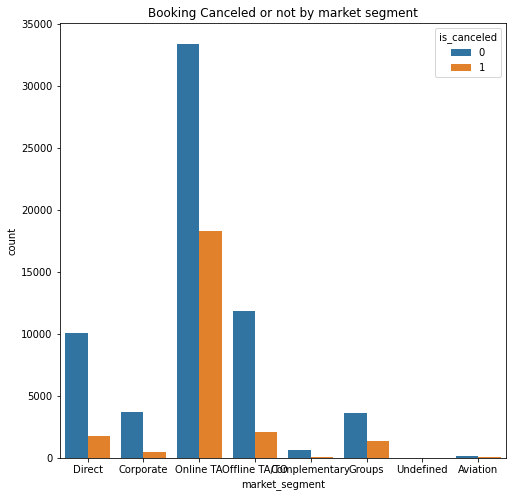

In [72]:
# Chart - 10 visualization code
#market segment and cancelleation
plt.title("Booking Canceled or not by market segment")
sns.countplot(x='market_segment',data=df ,hue='is_canceled')


##### 1. Why did you pick the specific chart?

**Answer Here**.
Show the counts of observations in each categorical bin using bars.
To Direct compare the Which market segment has canceled most hotel booking.


##### 2. What is/are the insight(s) found from the chart?

**Answer Here**
First we can see that Online booking by TA(tour Agent) has more done by the people.
And so that market segment of online has canceled booking more than other market segment.And most number of cancelation also done on online booking segment

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here**
As we can see that the offline and direct booking segment has less cancelation so the hotel should prioritise them more.

#** Multivariate Analysis**

#### Chart - 11

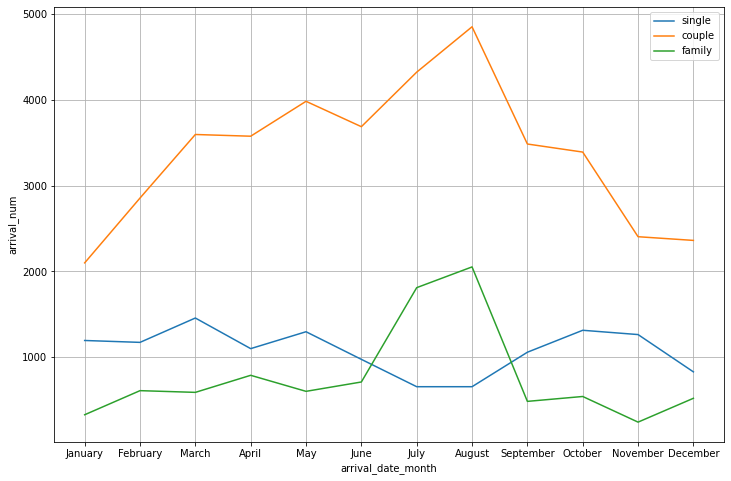

In [73]:
# Chart - 11 visualization code

single   = not_canceled[(not_canceled['adults']==1) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
couple   = not_canceled[(not_canceled['adults']==2) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
family   = not_canceled[not_canceled['adults'] + not_canceled['children'] + not_canceled['babies'] > 2]

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, ax = plt.subplots(figsize=(12, 8))

for type in ['single', 'couple', 'family']:
  d1 = eval(type).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  d1['arrival_date_month'] = pd.Categorical(d1['arrival_date_month'],categories=new_order,ordered=True)
  sns.lineplot(data=d1, x= 'arrival_date_month', y='arrival_num', label=type, ax=ax)
  
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

**Answer Here**.
A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value

##### 2. What is/are the insight(s) found from the chart?

**Answer Here**

Nearly 5000 couples booked rooms in hotel as compare to single and family during the peak of booking year.
customer comes in family book less rooms in all three years except July and august month.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here**

During peak booking time the focus should be on couple segment as they book more number of rooms then single and family segment.
So we can increase ADR that time for couples and family both.

#### Chart - 12

Text(0.5, 1.0, 'Preferred Meal Type')

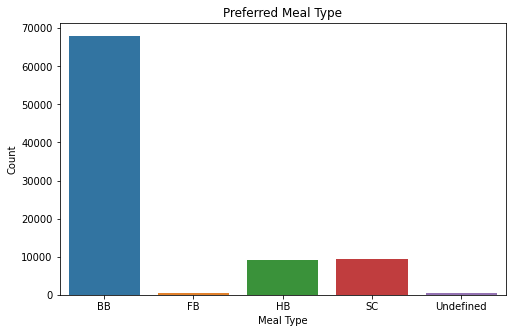

In [74]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")

# BB: Bed & Breakfast. - 
#HB: Half Board (Breakfast and Dinner normally) - 
#FB: Full Board (Beakfast, Lunch and Dinner) 

##### 1. Why did you pick the specific chart?

**Answer Here**.
Show the counts of observations in each categorical bin using bars.
Simple Representation by this bar graph for meal distribution.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here**

So the most preferred meal type by the guests is BB( Bed and Breakfast). HB- (Half Board) and SC- (Self Catering) are equally preferred.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here**
Yes, so we have to monitor and treat well to people who are more into BB(bed and breakfast).



#### Chart - 13(Correlation Heatmap)

In [75]:
# Correlation Heatmap visualization code
heatmap_df = df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_person','total_days_stay']]  


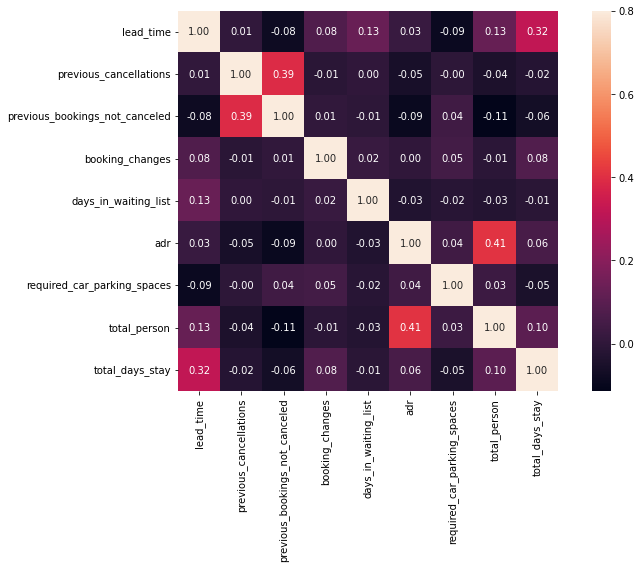

In [76]:
corrmat = heatmap_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

##### 1. Why did you pick the specific chart?

**Answer Here**

The primary purpose of Heat Maps is to better visualize the volume of locations/events within a dataset with the use of various colors.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here**

Total days stay and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here**
Higher lead time has higher chance of cancellation. Also, history of previous cancellations increases chances of cancellation.


#### Chart - 15 - Pair Plot 

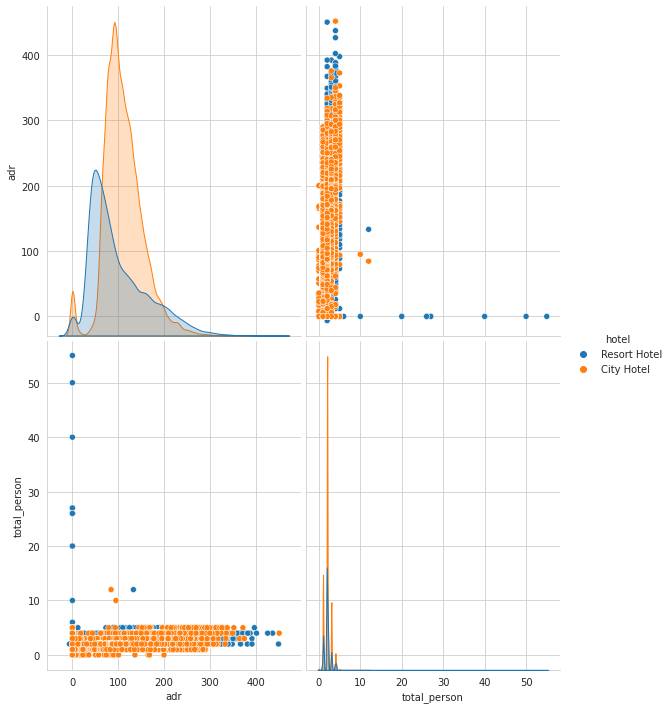

In [77]:
# Pair Plot visualization code
sns.set_style('whitegrid')
sns.pairplot(data = df[df['adr']<500][['hotel','adr', 'total_person']],height = 5,aspect = 0.8, hue ='hotel')


##### 1. Why did you pick the specific chart?

**Answer Here**.
A pairs plot allows us to see both distribution of single variables and relationships between two variables .It is also a great method to identify trends for follow-up analysis.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here**

Here we can see that For City hotel ADR is maximum if we compare with resort hotel, and ADR is also increases as number of people is less (<=5).
If number of of people will increase they tends to book Resort Hotel.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

**Answer Here**.

1. Cancellations are high when done through agents compared to direct bookings. Hotels need to do marketing and give special incentives for direct bookings as these may establish personal one to one relationships promoting customer loyalty.

2. Couple is the most popular accommodation type. So hotels can make arrangement and plans accordingly.

3. Repeated guests do not cancel their reservations, Of course there are some exceptions, So client have to more focused on repeated guests.

4. When the lead time exceeds about 60, guests frequently cancel their bookings (cancellation rate is higher after this point). So Client have to reduce lead time to get more ADR.

5. Client have to focus on Other type of bookings except TA/TO to increase revenue.
6. As we can see that the offline and direct booking segment has less cancelation so the hotel should prioritise them more.

# **Conclusion**

1. Around 60% bookings are for City hotel and 40% bookings are for Resort hotel, therefore City Hotel is busier than Resort hotel. Also the overall adr of City hotel is slightly higher than Resort hotel.

2. Mostly guests stay for less than 5 days in hotel and for longer stays Resort hotel is preferred.

3. Both hotels have significantly higher booking cancellation rates and very few guests less than 3 % return for another booking in City hotel. 5% guests return for stay in Resort hotel.

4. Most of the guests came from european countries, with most of guests coming from Portugal.

5. Guests use different channels for making bookings out of which most preferred way is TA/TO.

6. Almost 30% of bookings via TA/TO are cancelled.

7. July- August are the most busier and profitable months for both of hotels.

8. Couples are the most common guests for hotels, hence hotels can plan services according to couples needs to increase revenue.

9. For customers, generally the longer stays (more than 15 days) can result in better deals in terms of low adr.

10. Higher lead time has higher chance of cancellation. Also, history of previous cancellations increases chances of cancellation.







### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***